In [1]:
from sklearn.datasets import load_wine

In [2]:
data = load_wine()

In [3]:
x =data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [6]:
x_train = sc.fit_transform(x_train)  # perform standarization for features
x_test = sc.transform(x_test)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()  # for pac only x component is given
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [9]:
x_train.shape

(124, 13)

In [10]:
x_train[:,5]  # 1st 5 rows and all columns

array([-0.72665938,  0.50097104,  0.26667103, -0.16359762, -1.04739225,
        0.62024294,  0.13837203, -0.44219799,  0.84001126,  1.59887819,
        0.1202279 , -0.70714519, -0.4592388 , -0.51438834,  0.56104361,
       -0.38242748,  2.0635675 , -1.00895904, -0.88310174,  0.11533449,
        0.2055104 , -0.51409203,  0.06051075,  1.6396541 ,  0.66707023,
       -0.67744753, -0.53678574,  0.40680103, -0.55173904,  0.66105728,
        0.80997656, -0.12579377,  0.66505434, -0.78093485, -1.07516707,
        0.60828977,  0.62644127,  0.50434624, -0.21292553,  1.66378835,
       -0.12933027, -0.75699583, -0.05000903, -0.21966952,  0.08782901,
        1.96706503,  0.24264705, -0.23189567, -0.17180202, -0.22543877,
        1.23547774,  0.46301221, -0.19828414,  0.67092727,  0.29211421,
       -0.23763595, -0.76172399,  0.04065829,  0.2861856 , -0.54999471,
        1.26117943,  0.06603982,  0.86824667,  1.77163186, -0.59230655,
       -0.2837175 , -0.25362216, -1.03189851, -0.56753205, -0.02

In [11]:
pca.explained_variance_ratio_ #drawback is we dont known which value belongs to which columns. It is a combination of different columns

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

In [12]:
import numpy as np
var = np.cumsum(pca.explained_variance_ratio_)  # sorted in ascending order
var # cumsum: cumulative sum

array([0.37329648, 0.56148574, 0.67045365, 0.74769754, 0.81248349,
       0.85840362, 0.89827298, 0.92349212, 0.94607393, 0.96438317,
       0.98073654, 0.99357924, 1.        ])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

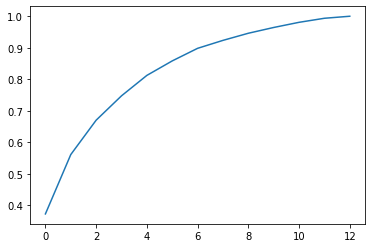

In [14]:
plt.plot(var) #x-axis is no of columns=13(0 to 12)

In [15]:
pca = PCA(n_components = 8)  #n_components = specify the column no to reduce. 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [16]:
x_train.shape  # reduced no of columns from 13 to 8

(124, 8)

In [17]:
x_train[:,5] # transformed values

array([-0.72665938,  0.50097104,  0.26667103, -0.16359762, -1.04739225,
        0.62024294,  0.13837203, -0.44219799,  0.84001126,  1.59887819,
        0.1202279 , -0.70714519, -0.4592388 , -0.51438834,  0.56104361,
       -0.38242748,  2.0635675 , -1.00895904, -0.88310174,  0.11533449,
        0.2055104 , -0.51409203,  0.06051075,  1.6396541 ,  0.66707023,
       -0.67744753, -0.53678574,  0.40680103, -0.55173904,  0.66105728,
        0.80997656, -0.12579377,  0.66505434, -0.78093485, -1.07516707,
        0.60828977,  0.62644127,  0.50434624, -0.21292553,  1.66378835,
       -0.12933027, -0.75699583, -0.05000903, -0.21966952,  0.08782901,
        1.96706503,  0.24264705, -0.23189567, -0.17180202, -0.22543877,
        1.23547774,  0.46301221, -0.19828414,  0.67092727,  0.29211421,
       -0.23763595, -0.76172399,  0.04065829,  0.2861856 , -0.54999471,
        1.26117943,  0.06603982,  0.86824667,  1.77163186, -0.59230655,
       -0.2837175 , -0.25362216, -1.03189851, -0.56753205, -0.02

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifier1 = GaussianNB()
classifier2 = DecisionTreeClassifier(criterion = 'entropy')
classifier3 = RandomForestClassifier(n_estimators=20, criterion='entropy')

In [20]:
classifier1.fit(x_train,y_train)
classifier2.fit(x_train,y_train)
classifier3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [21]:
y_pred1 = classifier1.predict(x_test)
y_pred2 = classifier2.predict(x_test)
y_pred3 = classifier3.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
print(accuracy_score(y_test,y_pred1))

1.0


In [24]:
print(accuracy_score(y_test,y_pred2))

0.9629629629629629


In [25]:
print(accuracy_score(y_test,y_pred3))

0.9814814814814815
